In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import pandas as pd

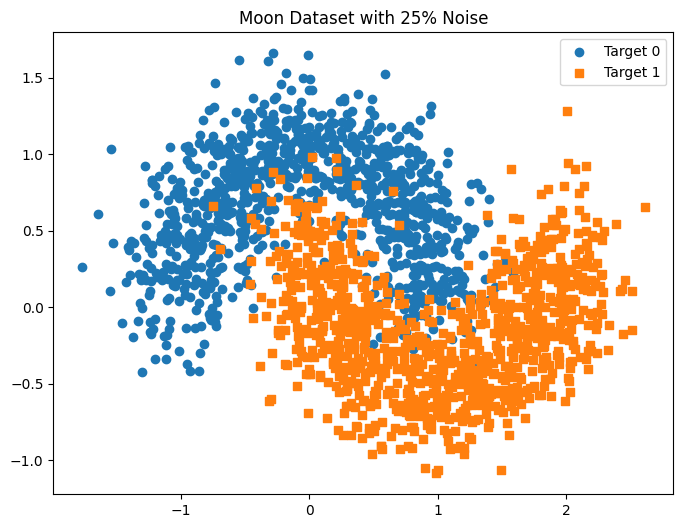

In [50]:
# create data
def generate_moon_dataset(num_samples, noise_percentage):

    np.random.seed(0)
    X, y = make_moons(n_samples=num_samples, noise=noise_percentage/100)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Target 0", marker='o')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Target 1", marker='s')
    plt.legend()
    plt.title(f'Moon Dataset with {noise_percentage}% Noise')
    plt.show()

    return X, y

num_samples = 2000
noise_percentage = 25

x, y = generate_moon_dataset(num_samples, noise_percentage)

In [19]:
# create a dataframe with data generated
df = pd.DataFrame(x, columns = ['var_1', "var_2"])
df['target'] = y

In [21]:
df.head()

,var_1,var_2,target
0,0.401709,0.806361,0
1,0.181528,-0.276118,1
2,-0.095059,-0.126680,1
3,-0.704389,1.008775,0
4,2.510334,-0.149091,1


In [33]:
# tranform the data with polinomial degree 4
polynomial = PolynomialFeatures(4)
x_poly = polynomial.fit_transform(x)

In [34]:
# training the model
normal_lr = LogisticRegression()
polynomial_lr = LogisticRegression()

In [35]:
normal_lr.fit(x,y)
polynomial_lr.fit(x_poly,y)

LogisticRegression()

In [36]:
# predict the data
nlr_predict = normal_lr.predict(x)
plr_predict = polynomial_lr.predict(x_poly)

In [37]:
df['normal_lr_predict'] = nlr_predict
df['polynomial_lr_predict'] = plr_predict

In [38]:
df.head()

,var_1,var_2,target,normal_lr_predict,polynomial_lr_predict
0,0.401709,0.806361,0,0,0
1,0.181528,-0.276118,1,1,1
2,-0.095059,-0.126680,1,1,1
3,-0.704389,1.008775,0,0,0
4,2.510334,-0.149091,1,1,1


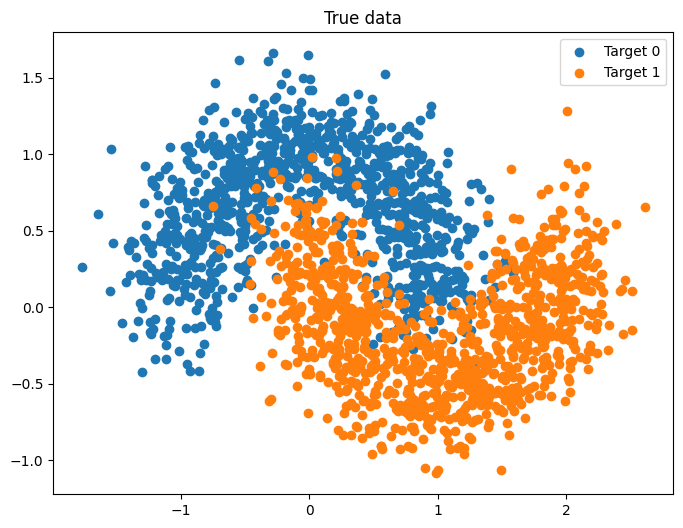

In [46]:
# plot the results
plt.figure(figsize=(8, 6))
plt.scatter(df[df['target'] == 0]['var_1'], df[df['target'] == 0]['var_2'], label="Target 0")
plt.scatter(df[df['target'] == 1]['var_1'], df[df['target'] == 1]['var_2'], label="Target 1")
plt.legend()
plt.title("True data")
plt.show()

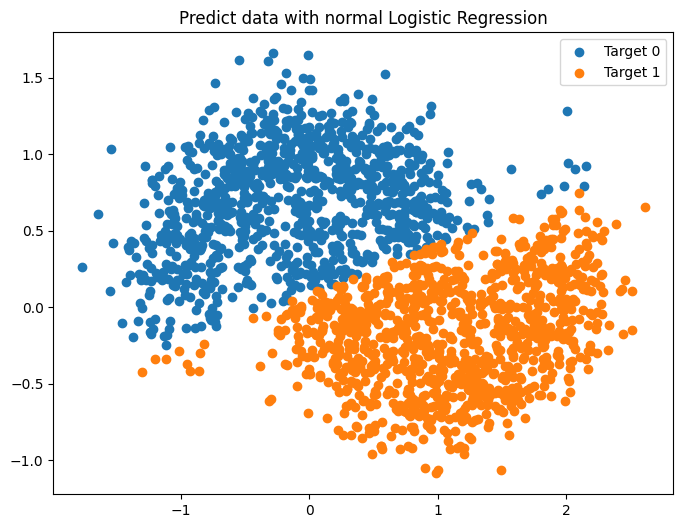

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(df[df['normal_lr_predict'] == 0]['var_1'], df[df['normal_lr_predict'] == 0]['var_2'], label="Target 0")
plt.scatter(df[df['normal_lr_predict'] == 1]['var_1'], df[df['normal_lr_predict'] == 1]['var_2'], label="Target 1")
plt.legend()
plt.title("Predict data with normal Logistic Regression")
plt.show()

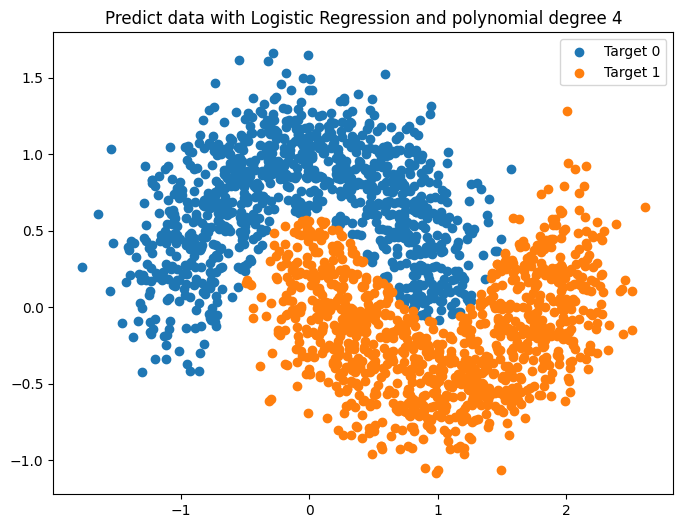

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(df[df['polynomial_lr_predict'] == 0]['var_1'], df[df['polynomial_lr_predict'] == 0]['var_2'], label="Target 0")
plt.scatter(df[df['polynomial_lr_predict'] == 1]['var_1'], df[df['polynomial_lr_predict'] == 1]['var_2'], label="Target 1")
plt.legend()
plt.title("Predict data with Logistic Regression and polynomial degree 4")
plt.show()